In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
# import and preprocess
df = pd.read_csv('../data/tmdb/processed_tmdb_data.csv')

df = df.drop(columns=['budget', 'revenue'])

X = df.drop(columns=['roi'])
y = df['roi']

print(X.describe())

             adult     runtime  release_month  release_year       Action  \
count  8843.000000  8843.00000    8843.000000   8843.000000  8843.000000   
mean      0.000339   108.73267       6.907497   2000.643786     0.273324   
std       0.018417    24.39978       3.430447     18.829266     0.445691   
min       0.000000     0.00000       1.000000   1913.000000     0.000000   
25%       0.000000    94.00000       4.000000   1993.000000     0.000000   
50%       0.000000   105.00000       7.000000   2006.000000     0.000000   
75%       0.000000   120.00000      10.000000   2014.000000     1.000000   
max       1.000000   254.00000      12.000000   2024.000000     1.000000   

         Adventure    Animation       Comedy        Crime  Documentary  ...  \
count  8843.000000  8843.000000  8843.000000  8843.000000  8843.000000  ...   
mean      0.188285     0.060047     0.324324     0.175845     0.000905  ...   
std       0.390961     0.237588     0.468148     0.380710     0.030066  ...   

In [13]:
def correlationHeatmap(X):
    corr_matrix = X.corr()
    img = plt.matshow(
        corr_matrix, 
        cmap='coolwarm', 
        vmin=-1, 
        vmax=1 
    )
    img.figure.set_size_inches( 10, 8 )
    img.axes.set_xticks(np.arange(corr_matrix.shape[1]), labels= list(corr_matrix.columns), rotation='vertical' )
    img.axes.set_yticks( np.arange(corr_matrix.shape[1]), labels=list(corr_matrix.index), rotation='horizontal' )
    img.figure.colorbar( img )
    img.axes.set_title("Correlation")
    plt.show()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

regression_model = LinearRegression().fit(X_train, y_train)

print(f'R^2 score for training set: {regression_model.score(X_train, y_train)}')
print(f'R^2 score for test set: {regression_model.score(X_test, y_test)}')

R^2 score for training set: 0.02315517877291917
R^2 score for test set: -4.712510892132515e+21


In [15]:
def residual(regression_model, X_test, y_test):
    # inputs: the regression model, test X and test y from the previous question
    # output: a list of residuals corresponding to each X in the input
    pred = regression_model.predict(X_test)
    res = (y_test - pred)
    return res


def plotResidualHistogram(regression_model, X_test, y_test):
    # inputs: the regression model, test X and test y from the previous question
    # Compute the residuals using the previous residual function
    # Loop through the attributes and plot a histogram for the residuals
    # Output: None, simply plot the histogram
    # ref - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
    plt.hist(residual(regression_model, X_test, y_test), bins=100)
    plt.title("Histogram of Residuals")
    plt.xlabel("Residual")
    plt.ylabel("Frequency")
    plt.show()

def plotResidualsVsAttributes(regression_model, X_test, y_test, attributes):
    # inputs: the regression model, test X and test y from the previous question, and a list of columns to plot residuals against
    # Compute the residuals using the previous function
    # Loop through the attributes and plot a scatter plot for each column's data and the residuals
    # Output: None, simply plot the graphs
    residuals = residual(regression_model, X_test, y_test)
    for attribute in attributes:
        plt.figure()
        plt.scatter(X_test[attribute], residuals)
        plt.title(f"Residuals vs {attribute}")
        plt.xlabel(attribute)
        plt.ylabel("Residual")
        plt.show()

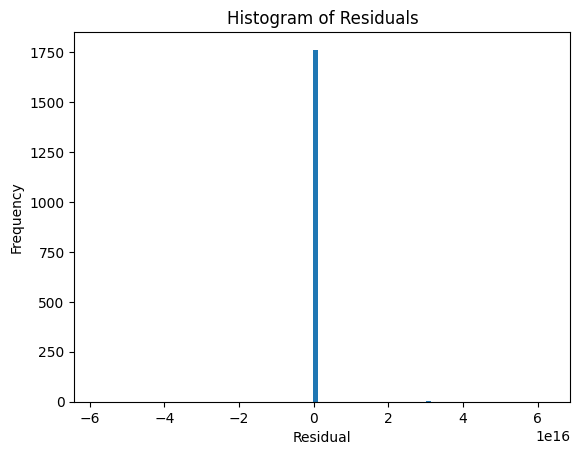

In [16]:
plotResidualHistogram(regression_model, X_test, y_test)

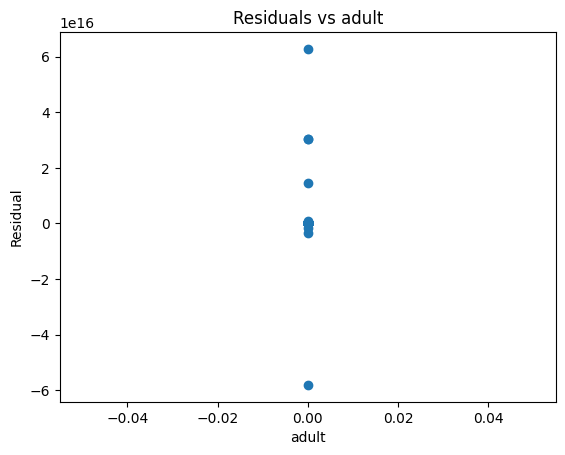

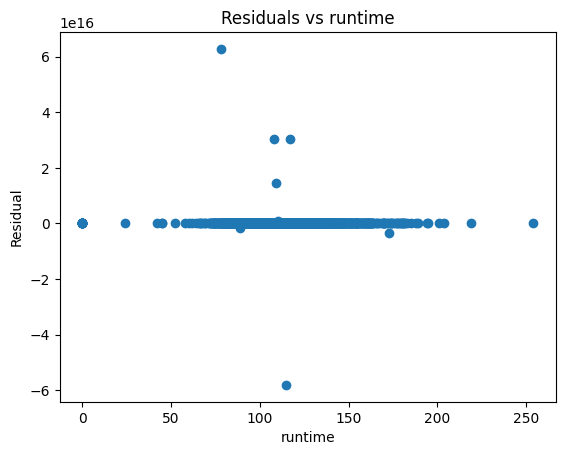

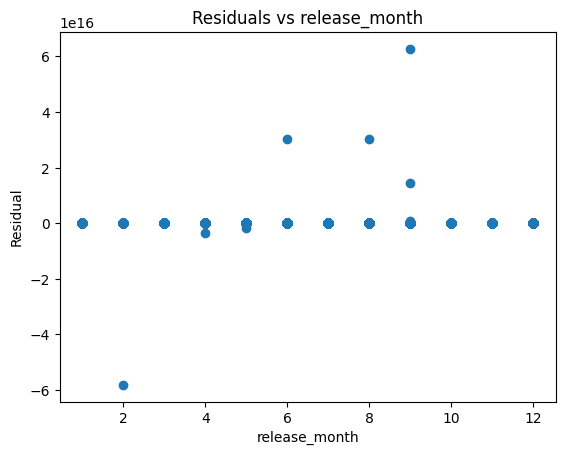

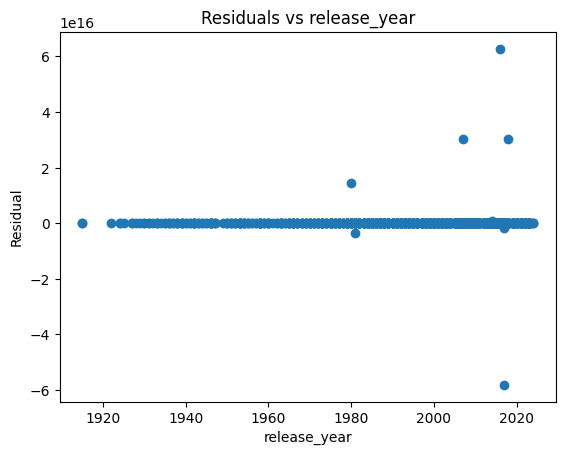

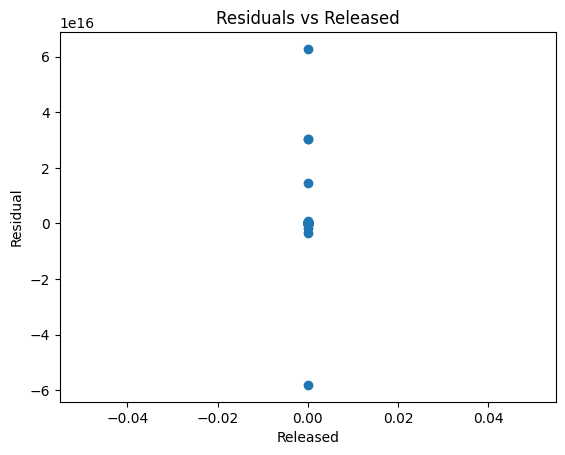

In [20]:
attribute_list = ['adult', 'runtime', 'release_month', 'release_year', 'Released']

attribute_list

plotResidualsVsAttributes(regression_model, X_test, y_test, attribute_list)

In [22]:
from sklearn.kernel_ridge import KernelRidge
np.random.seed(42)

kernel_regression_model = KernelRidge(alpha=0.5, kernel='rbf')
kernel_regression_model.fit(X_train, y_train)

print(f'R^2 score for Kernel Ridge Regression training set: {kernel_regression_model.score(X_train, y_train)}')
print(f'R^2 score for Kernel Ridge Regression test set: {kernel_regression_model.score(X_test, y_test)}')

R^2 score for Kernel Ridge Regression training set: 0.15359534855313628
R^2 score for Kernel Ridge Regression test set: -700.1826648018535
